In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Chargement des fichiers
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [4]:
#  Dimensions des datasets
print(" Train shape:", train.shape)
print(" Test shape:", test.shape)

 Train shape: (3960, 82)
 Test shape: (20, 59)


In [5]:
# Colonnes disponibles
print("\n🧩 Colonnes du train dataset :")
print(train.columns.tolist())


🧩 Colonnes du train dataset :
['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total

In [6]:
#  Aperçu du jeu de données
print("\n Aperçu des premières lignes :")
display(train.head())


 Aperçu des premières lignes :


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Valeurs manquantes
print("\n🔍 Valeurs manquantes dans train (Top 10) :")
display(train.isnull().sum().sort_values(ascending=False).head(10))


🔍 Valeurs manquantes dans train (Top 10) :


PAQ_A-PAQ_A_Total               3485
PAQ_A-Season                    3485
Fitness_Endurance-Time_Sec      3220
Fitness_Endurance-Time_Mins     3220
Fitness_Endurance-Max_Stage     3217
Physical-Waist_Circumference    3062
FGC-FGC_GSND_Zone               2898
FGC-FGC_GSD_Zone                2897
FGC-FGC_GSND                    2886
FGC-FGC_GSD                     2886
dtype: int64

## 🧾 Conclusion – Étape 1 : Chargement et aperçu initial des données

- Le dataset d'entraînement contient **3960 lignes et 82 colonnes**, tandis que celui de test est très petit (**20 lignes**).
- Les données couvrent plusieurs dimensions : démographie, mesures physiques, questionnaires, etc.
- On observe une **grande proportion de valeurs manquantes** dans certaines colonnes :
  - Plus de **80 % de valeurs manquantes** dans les colonnes liées à l'activité physique auto-rapportée (`PAQ_A-*`, `Fitness_Endurance-*`).
  - Certaines colonnes comme `FGC-*` ont également plus de 70 % de valeurs manquantes.


 **Implication** : Il sera nécessaire de faire une sélection de features ou une imputation prudente avant la modélisation.

On passe maintenant à l’analyse de la variable cible `sii` pour comprendre la distribution des classes et anticiper un éventuel déséquilibre.


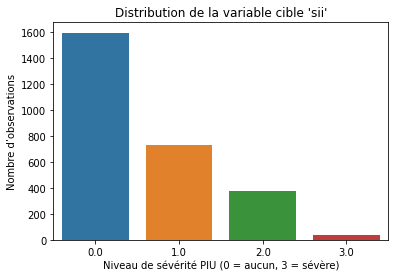

0.0    0.582602
1.0    0.266813
2.0    0.138158
3.0    0.012427
Name: sii, dtype: float64


In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='sii')
plt.title("Distribution de la variable cible 'sii'")
plt.xlabel("Niveau de sévérité PIU (0 = aucun, 3 = sévère)")
plt.ylabel("Nombre d’observations")
plt.show()

# Valeurs exactes
print(train['sii'].value_counts(normalize=True).sort_index())

## ✨ Conclusion – Analyse de la variable cible `sii`

On vient de regarder comment se répartissent les niveaux de sévérité d’usage problématique d’Internet (`sii`), et voilà ce qu’on peut dire :

- **La majorité des jeunes n’ont aucun problème** lié à leur usage d’Internet (classe 0 → environ 58 %).
- Ensuite, une partie montre quelques signes légers (classe 1 → 27 %) ou modérés (classe 2 → 14 %).
- Enfin, très peu sont dans une situation vraiment sévère (classe 3 → seulement 1 %).

Ce que ça veut dire pour notre projet :
- Les données sont **très déséquilibrées**, donc si on ne fait rien, notre modèle risque de toujours prédire la classe 0 (celle qui est la plus fréquente).
- Il faudra donc faire **très attention à bien traiter ce déséquilibre** quand on entraînera notre modèle, sinon il va rater les cas importants à détecter (ceux qui ont vraiment besoin d’aide).

Prochaine étape : on va analyser les colonnes numériques (comme l’âge, le poids…) et voir s’il y a des liens avec la variable `sii`. Ça nous aidera à comprendre quelles données peuvent vraiment nous aider à faire de bonnes prédictions.


In [10]:
#  Variables à explorer
numeric_cols = [
    'Basic_Demos-Age',
    'Physical-Height',
    'Physical-Weight',
    'Physical-BMI',
    'Physical-HeartRate',
    'Physical-Systolic_BP',
    'Physical-Diastolic_BP'
]


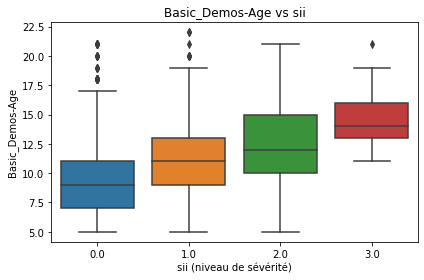

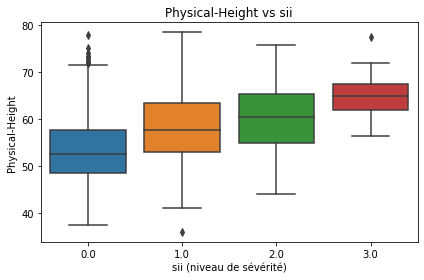

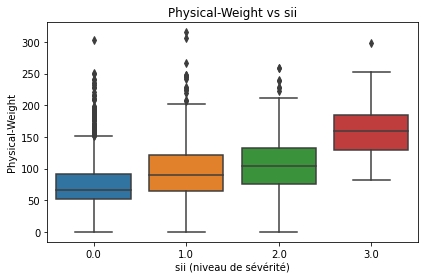

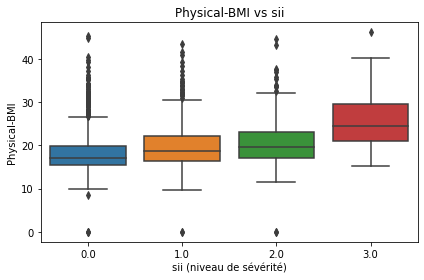

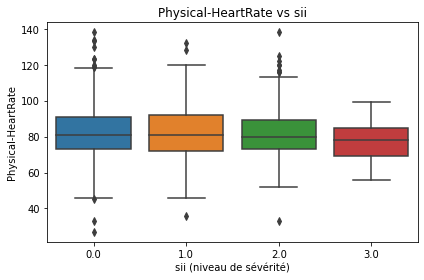

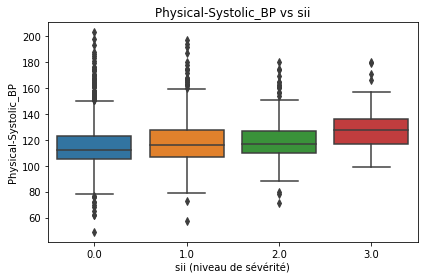

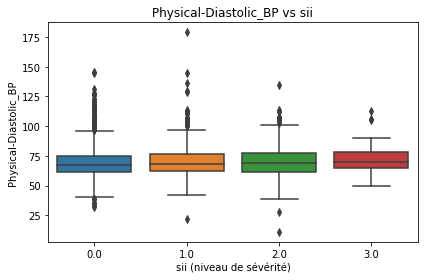

In [15]:
# Boucle sur chaque variable
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x='sii', y=col)
    plt.title(f"{col} vs sii")
    plt.xlabel("sii (niveau de sévérité)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

##  Analyse des variables numériques

On a exploré quelques variables simples (âge, taille, poids, IMC, fréquence cardiaque, tension) selon les niveaux de sévérité PIU (`sii`). Voici ce qu'on retient :

- **L'âge** semble clairement lié à la sévérité : plus les jeunes sont âgés, plus le niveau `sii` tend à augmenter.
- **La taille, le poids** suivent une tendance similaire, probablement à cause de leur lien avec l'âge.
- **L’IMC (BMI)** augmente visiblement avec `sii` → peut refléter un mode de vie plus sédentaire.
- **Heart rate** et **blood pressure** ne montrent pas de tendance forte → à tester, mais pas prioritaires.

Ces premières variables nous donnent déjà un bon point de départ pour construire un modèle simple, basé sur des caractéristiques physiques.


In [14]:
# Corrélation du score PCIAT total avec 'sii'
correlation = train[['PCIAT-PCIAT_Total', 'sii']].corr()
print(" Corrélation entre PCIAT Total et sii :")
print(correlation)

 Corrélation entre PCIAT Total et sii :
                   PCIAT-PCIAT_Total       sii
PCIAT-PCIAT_Total           1.000000  0.899681
sii                         0.899681  1.000000


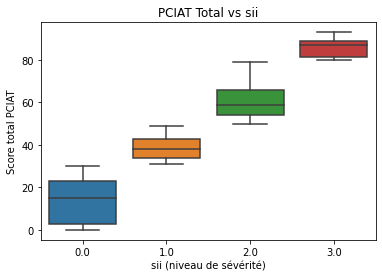

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=train, x='sii', y='PCIAT-PCIAT_Total')
plt.title("PCIAT Total vs sii")
plt.xlabel("sii (niveau de sévérité)")
plt.ylabel("Score total PCIAT")
plt.show()

## Analyse du score PCIAT

Le score total du questionnaire PCIAT (`PCIAT-PCIAT_Total`) est **fortement corrélé** avec la sévérité d’usage problématique d’Internet (`sii`), avec un coefficient de corrélation de **0.89**.

- Le graphique confirme visuellement que **plus le score PCIAT est élevé, plus `sii` est élevé aussi**.
- C’est clairement l’une des **meilleures variables prédictives** de notre dataset.
- On pourra sûrement s’appuyer **uniquement sur le score total**, sans forcément utiliser toutes les 20 questions individuellement.

On garde donc `PCIAT-PCIAT_Total` dans notre modèle final.


 Corrélation avec sii :
                                        PreInt_EduHx-computerinternet_hoursday  \
PreInt_EduHx-computerinternet_hoursday                                1.000000   
sii                                                                   0.336526   

                                             sii  
PreInt_EduHx-computerinternet_hoursday  0.336526  
sii                                     1.000000  


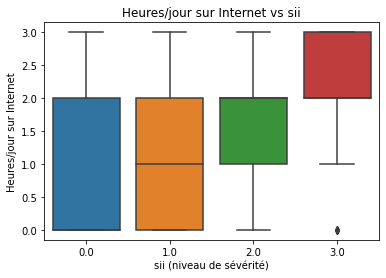

In [19]:
# Corrélation avec la variable cible
corr = train[['PreInt_EduHx-computerinternet_hoursday', 'sii']].corr()
print(" Corrélation avec sii :")
print(corr)

#  Visualisation
plt.figure(figsize=(6,4))
sns.boxplot(data=train, x='sii', y='PreInt_EduHx-computerinternet_hoursday')
plt.title("Heures/jour sur Internet vs sii")
plt.xlabel("sii (niveau de sévérité)")
plt.ylabel("Heures/jour sur Internet")
plt.show()

##  Analyse de l’utilisation quotidienne d’Internet

On a étudié la colonne `PreInt_EduHx-computerinternet_hoursday` (heures/jour passées sur Internet) par rapport à `sii` :

- La **corrélation est modérée** (≈ 0.33) : ce n’est pas une feature aussi forte que le score PCIAT, mais elle apporte tout de même de l’information.
- Le boxplot montre que **la médiane augmente avec `sii`**, surtout pour les cas les plus sévères.
- Il y a cependant beaucoup de variabilité entre les groupes (overlap).

 On décide donc de **garder cette variable dans notre modèle**, car elle renforce le signal d’usage excessif, surtout en combinaison avec d'autres features.


 Corrélation avec sii :
                   SDS-SDS_Total_Raw  SDS-SDS_Total_T       sii
SDS-SDS_Total_Raw           1.000000         0.996134  0.229692
SDS-SDS_Total_T             0.996134         1.000000  0.232982
sii                         0.229692         0.232982  1.000000


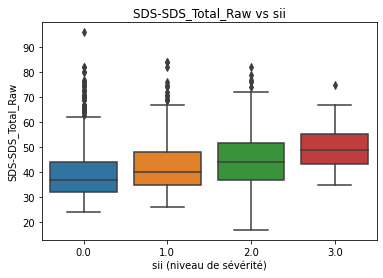

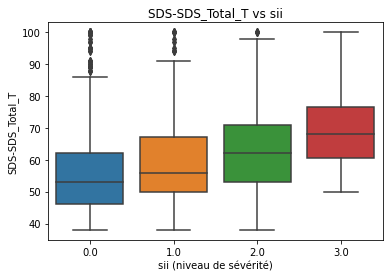

In [21]:
# Corrélation entre SDS et sii
corr = train[['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'sii']].corr()
print(" Corrélation avec sii :")
print(corr)

# Visualisation des deux scores
for col in ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train, x='sii', y=col)
    plt.title(f"{col} vs sii")
    plt.xlabel("sii (niveau de sévérité)")
    plt.ylabel(col)
    plt.show()


## Analyse du score de dépression (SDS)

On a exploré les scores de dépression `SDS-SDS_Total_Raw` et `SDS-SDS_Total_T`.

- Les deux sont **fortement corrélés entre eux**, donc il suffit d’en garder un (par exemple le score T standardisé).
- Ils montrent une **corrélation modérée avec `sii`** (~0.23).
- Le boxplot indique une **tendance à la hausse** du score de dépression avec l’augmentation de la sévérité PIU.

Conclusion : ces variables apportent un signal complémentaire intéressant, surtout en lien avec la santé mentale. On en garde une dans notre modèle (le score T de préférence).
